In [48]:
import numpy as np
from scipy import signal as sig
from scipy import fftpack as fft
from matplotlib import pyplot as plt
%matplotlib inline

import sys
sys.path.append('../../../../Seasonality_of_WBC_eddies/Python/sst_analysis/Idealized_Model')
import idealmodel
reload(idealmodel)

<module 'idealmodel' from '../../../../Seasonality_of_WBC_eddies/Python/sst_analysis/Idealized_Model/idealmodel.py'>

# Generate a Isotropic synthetic spectrum #


## Webb (1964) / McCaffrey (2014) ##

Webb's original paper only deals with 1D signals and spectra while McCaffrey deals with 2D isotropic spectra. This is a subtle but crucial difference. For the proof of the relation between spectra and the structure function, the spectra must satisfy:

$$ \langle \theta^2 \rangle = \int_{0}^{\infty} B(K) \ dK  $$

Let's unpack this a little bit.

## 1D signal ##

For a 1D signal, the left-hand side of the equation above represents an integral over $x$. The $\textbf{DOMAIN-AVERAGED}$ variance is defined as:

$$ \langle \theta^2 \rangle = \frac{1}{X} \int_{-\infty}^{\infty} \theta^2 (x) dx = \sum_{n} \theta(x_n)^2 \ \ \ [^\circ C^2] $$

We define the theoretical Fourier transform $\hat{\theta}(k)$ via the following relation:

$$ \theta (x) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \hat{\theta}(k) e^{ikx} dk $$

$$ \hat{\theta} (k) = \int_{-\infty}^{\infty} \theta (x) e^{-ikx} dx $$

The [Plancherel Theorem](http://en.wikipedia.org/wiki/Fourier_transform#Plancherel_theorem_and_Parseval.27s_theorem) states that

$$ \int_{-\infty}^{\infty} | \theta (x) |^2 dx = \int_{-\infty}^{\infty} | \hat{\theta} (k) |^2 dk $$

$$ E = \int P(k) dk = \sum_{i} | \tilde{\theta} (k) |^2, \ \ \ P(k) = \frac{| \tilde{\theta} (k) |^2}{\Delta k} $$

All we have to do to satisfy Webb's condition is to set $K=k$, assume that $ |\hat{\theta}(-k)|^2 = |\hat{\theta}(k)|^2 $ (always true for a real function) and define

$$ B_{1D}(K) = \frac{2}{N\Delta x}|\hat{\theta}(K)|^2 = \frac{2}{N\Delta x}\big( \frac{1}{\Delta k} \big)^2 \ |\tilde{\theta}(K)|^2 = 2P(k) \ \ \ [^\circ C^2 m] $$

## 2D signal ##

The situation for a 2D field is more complicated. The $\textbf{DOMAIN-AVERAGED}$ variance is

$$ \langle \theta^2 \rangle = \frac{1}{XY} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \theta^2 (x,y) \ dxdy \ \ \ [^\circ C^2] $$

The Fourier pairs are

$$ \theta(x,y) = \frac{1}{(2\pi)^2} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \hat{\theta}(k,l) e^{i(kx+ly)} dkdl $$

$$ \hat{\theta}(k,l) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \theta(x,y) e^{-i(kx+ly)} dxdy = \Delta x \Delta y \sum_m \sum_n \theta(x_m,y_n) e^{-i(kx_m+ly_n)} = \Delta x \Delta y \ \tilde{\theta}(k,l) \ \ \ [^\circ C\ m^2 ] $$

where $\hat{\theta} \ \ [^\circ C \ m^2]$ is the theoretical Fourier coefficients and $\tilde{\theta} \ \ [^\circ C]$ is the Fourier coefficients derived by the python algorithm. The Plancherel theorem still looks the same

$$ \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \theta (x,y)^2 dxdy = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} | \hat{\theta} (k,l) |^2 dkdl $$

and writing out the RHS in a discrete form

$$ \Delta x \Delta y \sum_p \sum_q \theta (x_p, y_q)^2 = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \theta (x,y)^2 dxdy = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} | \hat{\theta} (k,l) |^2 dkdl = \Delta k \Delta l \sum_m \sum_n |\hat{\theta}(k_m,l_n)|^2 = \Delta k \Delta l (\Delta x \Delta y)^2 \sum_m \sum_n |\tilde{\theta}(k_m,l_n)|^2 $$

The frequencies are defined as

$$ k = \frac{(0,1,2,\cdot\cdot\cdot,\frac{N}{2}-1)}{N\Delta x} $$

so 

$$ \Delta k = \frac{1}{N\Delta x}, \ \ \ \Delta x = \frac{1}{N \Delta k} $$

Hence

$$ \Delta x \Delta y \sum_p \sum_q \theta (x_p, y_q)^2 = \frac{1}{{N_x}^2{N_y}^2\Delta k\Delta l} \sum_m \sum_n |\tilde{\theta}(k_m,l_n)|^2 $$

$$ E = \iint P(k,l) dk\ dl = \sum_m \sum_n |\tilde{\theta}(k_m,l_n)|^2, \ \ \ P(k_m,l_n) = \frac{|\tilde{\theta}(k_m,l_n)|^2}{\Delta k \Delta l} $$

Now defining the normalized discrete Fourier coefficients as

$$ \breve{\theta}(k_m,l_n) \equiv \frac{\tilde{\theta}(k_m,l_n)}{N_xN_y\sqrt{\Delta k\Delta l}} \ \ \ \ [^\circ C\ m] $$

the Plancherel theorem is

$$ \Delta x \Delta y \sum_p \sum_q \theta (x_p, y_q)^2 = \sum_m \sum_n \big|\breve{\theta}(k_m,l_n)\big|^2 $$

and PSD becomes

$$ E = {N_x}^2{N_y}^2\Delta k\Delta l\sum_m\sum_n \big|\breve{\theta}(k_m,l_n)\big|^2,\ \ \ P(k_m,l_n) = {N_x}^2{N_y}^2 \big|\breve{\theta}(k_m,l_n)\big|^2 $$

However, the isotropic spectrum needs to be defined carefully. For any signal $f(k,l)$, we can transform to polar coordinates $f(K,\phi)$ where

$$ K = \sqrt{k^2+l^2}, \ \ \ \phi = \arctan\bigg[ \frac{l}{k} \bigg] $$

the integral of $f$ over all $k$ and $l$ is written as

$$ \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(k,l) \ dkdl = \int_{0}^{\infty} \int_{-\pi}^{\pi} f(K, \phi)\ J_f d\phi dK = \int_{0}^{\infty} \Big(\int_{-\pi}^{\pi} f(K, \phi) K \ d\phi \Big) dK $$

where the Jacobian is

$$ J_f = \frac{\partial (k,l)}{\partial (K,\phi)} = \Bigg| \begin{matrix} \cos\theta &\sin\theta \\ -K\sin\theta &K\cos\theta \end{matrix} \Bigg| = K $$

The key point is that, due to transformation to polar coordinates, we pick up an extra factor of $K$ in the integral. In order to satisfy Webb's condition in 2D, we need 

$$ \int_{0}^{\infty} B(K, \phi) \ dK = \langle \theta^2 \rangle = \frac{1}{\pi R^2} \int_{0}^{\infty} \Big(\int_{-\pi}^{\pi} |\hat{\theta}(K, \phi)|^2 K \ d\phi \Big) dK \ \ \ \ [^\circ C^2] $$

$$ B_{2D}(K, \phi) = \frac{1}{\pi R^2}\int_{-\pi}^{\pi} |\hat{\theta}(K, \phi)|^2 K \ d\phi \ \ \ \ [^\circ C^2 m] $$

where $\Delta K = \frac{1}{N_r\Delta r} = \frac{1}{R}$. For a isotropic field, this reduces to

$$ B_{2D}(K) = \frac{(\Delta K)^2}{\pi} \int_{-\pi}^{\pi} |\hat{\theta}(K)|^2 K \ d\phi = 2 K (\Delta K)^2 |\hat{\theta}(K)|^2 $$

$$ \langle \theta^2 \rangle = \int_{0}^{\infty} \ B_{2D}(K) \ dK = \sum_{n} B_{2D}(K_n) \Delta K = \sum_{n} 2 K_n | \hat{\theta}(K_n)|^2 (\Delta K)^3 \ \ \ \ [^\circ C^2] $$

Now, the relation between the Cartesian and polar coordinate for the Fourier components are

$$ |\hat{\theta}|^2 = (\Delta x\Delta y)^2 |\tilde{\theta}|^2,\ \ \ |\tilde{\theta}|^2 = {N_x}^2{N_y}^2\Delta k\Delta l\ |\breve{\theta}|^2 $$

$$ \therefore\ |\hat{\theta}(k_m,l_n)|^2 = (N_x\Delta x)(N_y\Delta y)\ |\breve{\theta}(k_m,l_n)|^2 \ \Leftrightarrow \ |\hat{\theta} (K_n,\phi)|^2 = \pi (N_r\Delta r)^2\ |\breve{\theta}(K_n,\phi)|^2 \ \Leftrightarrow \ |\hat{\theta}(K_n,\phi)|^2 = \frac{\pi}{(\Delta K)^2}|\breve{\theta}(K_n,\phi)|^2 \ \ \ [^\circ C^2] $$

The equivalence relation comes from $\hat{\theta}(k,l) = \hat{\theta}(K,\phi)$, which is simply writing the same field in different coordinates. In an isotrophic state

$$ |\hat{\theta}(K_n)|^2 = \frac{\pi}{(\Delta K)^2}|\breve{\theta}(K_n)|^2 \ \ \ [^\circ C^2] $$

Hence the power-spectral density $ B_{2D}(K) $ is

$$ \therefore\ B_{2D}(K_n) = 2\pi K_n (\Delta K)^2 | \hat{\theta}(K_n)|^2 = 2\pi^2 K_n | \breve{\theta}(K_n) |^2 \ \ \ \ [^\circ C^2 m] $$

This means that if we want $B_{2D}(K) = B_0{K}^{\alpha}$, we need

$$ {r_{k,l}}^2 \approx |\breve{\theta}(k,l)|^2 = (2\pi^2)^{-1} K^{-1} B_{2D}(K) = (2\pi)^{-1} B_0{K}^{\alpha-1} $$

In [5]:
N = 2**10
dL = 1.
k = fft.fftshift(fft.fftfreq(N, dL))
l = fft.fftshift(fft.fftfreq(N, dL))

print N
print k.shape, l.shape
print k

1024
(1024,) (1024,)
[-0.5        -0.49902344 -0.49804688 ...,  0.49707031  0.49804688
  0.49902344]


In [6]:
K = np.sqrt(k**2+l[:, np.newaxis]**2)

print K.shape

(1024, 1024)


In [8]:
alpha = -3.
Bo = 1e1
r_kl = np.ma.masked_invalid( np.sqrt(Bo * .5 / np.pi * K**(alpha-1.)) ).filled(0.)

/Users/UchidaTakaya/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


/Users/UchidaTakaya/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


<matplotlib.colorbar.Colorbar instance at 0x10c641e18>

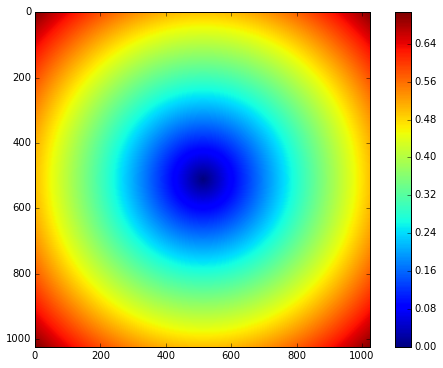

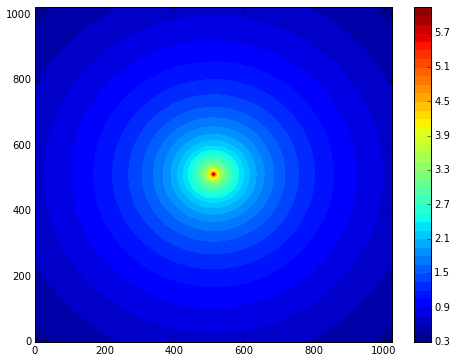

In [10]:
plt.figure( figsize=(9,6) )
plt.imshow(K)
plt.colorbar()

plt.figure( figsize=(8,6) )
plt.contourf(np.log10(r_kl), 50)
plt.colorbar()

## Symmetry of the Fourier Component ##

If the function $ f(x) $ is real, then its Fourier transform:

$$ \tilde{f} (k) = \int \frac{dx}{\sqrt{2\pi}} f (x) e^{-ikx} $$

obeys the relation

$$ {\tilde{f}}^{\ *}(k) = \int \frac{dx}{\sqrt{2\pi}} f (x) e^{ikx} = \tilde{f}(-k) $$


For a 2D case, the Fourier transform is:

$$ \tilde{\theta} (k, l) = \iint \frac{1}{\sqrt{2\pi}} \theta (x, y) e^{-i(kx+ly)} dxdy $$

and obeys the relation

$$ {\tilde{\theta}}^{\ *}(k, l) = \iint \frac{1}{\sqrt{2\pi}} \theta (x, y) e^{i(kx+ly)} dxdy = \tilde{\theta}(-k, -l) $$

Since the Fourier transform is a complex number, $ \tilde{\theta} (k, l) = r(k, l) e^{i \phi (k, l)} $, the complex conjugate can be written as $ {\tilde{\theta}}^{\ *} (k, l) = r(k, l) e^{-i \phi (k, l)} $. When the function $\theta (x, y)$ is $\textbf{real}$, therefore the relation: 

$$ r(-k, -l) e^{i \phi (-k, -l)} = {\tilde{\theta}} (-k, -l) = {\tilde{\theta}}^{\ *} (k, l) = r(k, l) e^{-i \phi (k, l)} $$

must hold. In other words, if we prescribe the Fourier transform $ \tilde{\theta} (k, l) $ for $ \textbf{K}_1 = (k, l) $, the Fourier field for $ \textbf{K}_2 = (-k, -l) $ will be the complex conjugate $ \tilde{\theta}^{\ *} (k, l) $. Hence,

$$ r(-k, -l) = r(k, l), \ \ \ \ \phi(-k, -l) = -\phi(k, l) $$

This means that in order to create a Fourier field that represents a real function in the spatial domain, when the Fourier field is prescribed for $ \textbf{K}_1 = (k, l) $, the amplitude needs to be rotated $180^{\circ}$ and the phase is rotated $180^{\circ}$ with the opposite sign for $ \textbf{K}_2 = (-k, -l) $.

### Generate random phase

#### Test whether $ \phi(-k, -l) = -\phi(k, l) $ holds ####

0.292986926776 -0.292986926776
1.26922075156 -1.26922075156
-0.207817131408 -0.207817131408


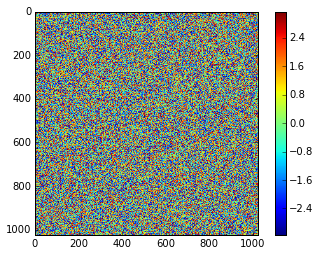

In [13]:
phi = np.zeros((N, N))
#a = np.arange(-np.pi, np.pi, 0.1)

phi_upper_right = 2.*np.pi*np.random.random((N/2-1, N/2-1)) - np.pi
phi[N/2+1:,N/2+1:] = phi_upper_right.copy()
phi[1:N/2, 1:N/2] = - phi_upper_right[::-1, ::-1].copy()


phi_upper_left = 2.*np.pi*np.random.random((N/2-1, N/2-1)) - np.pi
phi[N/2+1:,1:N/2] = phi_upper_left.copy()
phi[1:N/2, N/2+1:] = - phi_upper_left[::-1, ::-1].copy()


phi_upper_middle = 2.*np.pi*np.random.random(N/2) - np.pi
phi[N/2:, N/2] = phi_upper_middle.copy()
phi[1:N/2, N/2] = - phi_upper_middle[1:][::-1].copy()


phi_right_middle = 2.*np.pi*np.random.random(N/2-1) - np.pi
phi[N/2, N/2+1:] = phi_right_middle.copy()
phi[N/2, 1:N/2] = - phi_right_middle[::-1].copy()


phi_edge_upperleft = 2.*np.pi*np.random.random(N/2) - np.pi
phi[N/2:, 0] = phi_edge_upperleft.copy()
phi[1:N/2, 0] = - phi_edge_upperleft[1:][::-1].copy()


phi_bot_right = 2.*np.pi*np.random.random(N/2) - np.pi
phi[0, N/2:] = phi_bot_right.copy()
phi[0, 1:N/2] = - phi_bot_right[1:][::-1].copy()


phi_corner_leftbot = 2.*np.pi*np.random.random() - np.pi


print phi[N/2-1, N-1], phi[N/2+1, 1]
print phi[N/2+1, N/2+1], phi[N/2-1, N/2-1]


#phi[:N/2, :] = -np.rot90(np.rot90(phi[N/2:, :]))
#phi[:N/2, :] = -phi[N/2:, :][::-1,::-1]
i, j = 25, 40
print phi[N/2+j, N/2+i], -phi[N/2-j, N/2-i]

for i in range(1, N/2):
    for j in range(1, N/2):
        assert (phi[N/2+j, N/2+i] == - phi[N/2-j, N/2-i])
        
for i in range(1, N/2):
    for j in range(1, N/2):
        assert (phi[N/2+j, N/2-i] == - phi[N/2-j, N/2+i])
        
for i in range(1, N/2):
    assert (phi[N/2, N-i] == - phi[N/2, i])
    assert (phi[N-i, N/2] == - phi[i, N/2])
    assert (phi[N-i, 0] == - phi[i, 0])
    assert (phi[0, i] == - phi[0, N-i])


plt.figure()
plt.imshow(phi)
plt.colorbar()
plt.show()

### Generate the Fourier field $\tilde{\theta} (k,l) = r_{k,l}e^{i \phi_{k,l}} $ ###

In [15]:
F_theta = r_kl*np.exp(1j*phi)

/Users/UchidaTakaya/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


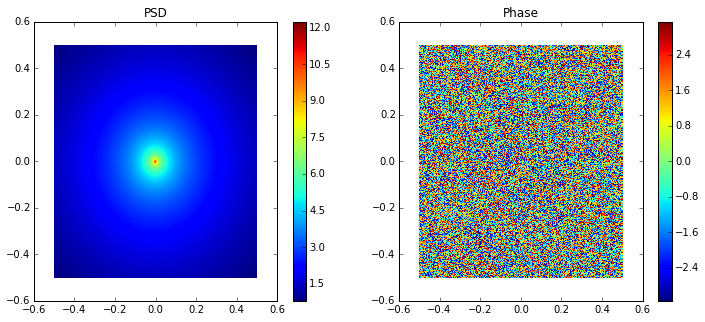

In [18]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121)
ca1 = ax1.pcolormesh(kk, ll, np.ma.masked_invalid( np.log10(np.abs(F_theta)**2) ) )
cbar = fig.colorbar(ca1)
ax1.set_title('PSD')

ax2 = fig.add_subplot(122)
ca2 = ax2.pcolormesh(kk, ll, np.angle(F_theta))
cbar = fig.colorbar(ca2)
plt.title('Phase')

### Derive the field in (x,y) domain (inverse Fourier transform) ###
### $ \theta(x, y) = \iint \tilde{\theta}(k, l) e^{i(kx+ly)} dkdl $

In [19]:
theta = fft.ifft2(fft.ifftshift(F_theta))
#theta = fft.ifft2(F_theta)

print theta.shape

(1024, 1024)


(0, 1023, 0, 1023)

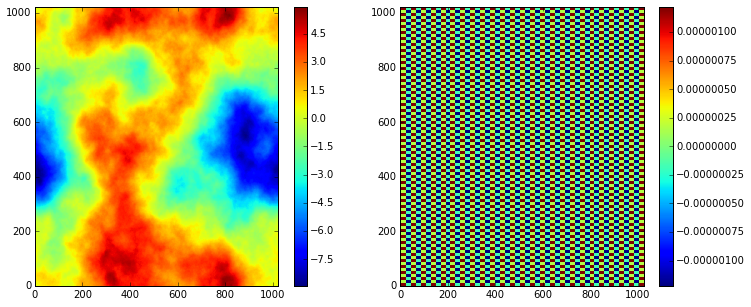

In [23]:
x = np.arange(N)
y = np.arange(N)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121)
ca1 = ax1.pcolormesh(x, y, np.real(theta))
cbar = fig.colorbar(ca1)
#plt.clim(0, 1e3)
plt.axis((0, N-1, 0, N-1))

ax2 = fig.add_subplot(122)
ca2 = ax2.pcolormesh(x, y, np.imag(theta))
cbar = fig.colorbar(ca2)
#plt.clim(-1e-2, 1e-2)
plt.axis((0, N-1, 0, N-1))

### Define function that generates synthetic data ###

In [80]:
def spatial_synthetic( N=2**10, dL=1., alpha=-3., Bo=1e1, mn=0., std=8e-1):
    
    
    k = fft.fftshift(fft.fftfreq(N, dL))
    l = fft.fftshift(fft.fftfreq(N, dL))
    kk, ll = np.meshgrid(k, l)
    
    K = np.sqrt(k**2+l[:, np.newaxis]**2)
    
    
    slope = alpha * np.ones( (K.shape) )
    slope += np.random.normal(mn, std, K.shape)   # Add Gaussian noise to slope
    r_kl = np.ma.masked_invalid( np.sqrt(Bo * .5 / np.pi * K**(slope-1.)) ).filled(0.)

    
    phi = np.zeros((N, N))

    phi_upper_right = 2.*np.pi*np.random.random((N/2-1, N/2-1)) - np.pi
    phi[N/2+1:,N/2+1:] = phi_upper_right.copy()
    phi[1:N/2, 1:N/2] = - phi_upper_right[::-1, ::-1].copy()

    phi_upper_left = 2.*np.pi*np.random.random((N/2-1, N/2-1)) - np.pi
    phi[N/2+1:,1:N/2] = phi_upper_left.copy()
    phi[1:N/2, N/2+1:] = - phi_upper_left[::-1, ::-1].copy()

    phi_upper_middle = 2.*np.pi*np.random.random(N/2) - np.pi
    phi[N/2:, N/2] = phi_upper_middle.copy()
    phi[1:N/2, N/2] = - phi_upper_middle[1:][::-1].copy()

    phi_right_middle = 2.*np.pi*np.random.random(N/2-1) - np.pi
    phi[N/2, N/2+1:] = phi_right_middle.copy()
    phi[N/2, 1:N/2] = - phi_right_middle[::-1].copy()

    phi_edge_upperleft = 2.*np.pi*np.random.random(N/2) - np.pi
    phi[N/2:, 0] = phi_edge_upperleft.copy()
    phi[1:N/2, 0] = - phi_edge_upperleft[1:][::-1].copy()

    phi_bot_right = 2.*np.pi*np.random.random(N/2) - np.pi
    phi[0, N/2:] = phi_bot_right.copy()
    phi[0, 1:N/2] = - phi_bot_right[1:][::-1].copy()

    phi_corner_leftbot = 2.*np.pi*np.random.random() - np.pi

#     print phi[N/2-1, N-1], phi[N/2+1, 1]
#     print phi[N/2+1, N/2+1], phi[N/2-1, N/2-1]

#     i, j = 25, 40
#     print phi[N/2+j, N/2+i], -phi[N/2-j, N/2-i]

    for i in range(1, N/2):
        for j in range(1, N/2):
            assert (phi[N/2+j, N/2+i] == - phi[N/2-j, N/2-i])
        
    for i in range(1, N/2):
        for j in range(1, N/2):
            assert (phi[N/2+j, N/2-i] == - phi[N/2-j, N/2+i])
        
    for i in range(1, N/2):
        assert (phi[N/2, N-i] == - phi[N/2, i])
        assert (phi[N-i, N/2] == - phi[i, N/2])
        assert (phi[N-i, 0] == - phi[i, 0])
        assert (phi[0, i] == - phi[0, N-i])

    
    F_q = r_kl * np.exp(1j*phi)
    
    q = fft.ifft2(fft.ifftshift(F_q))
    
    return q, F_q, r_kl, phi

### Generate five independent realizations of the synthetic fields

/Users/UchidaTakaya/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: RuntimeWarning: divide by zero encountered in power


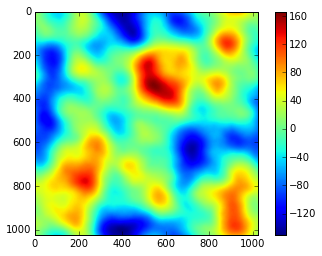

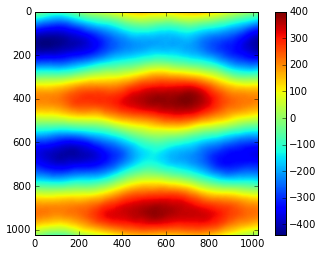

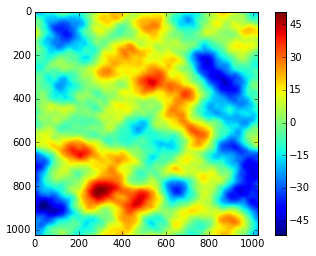

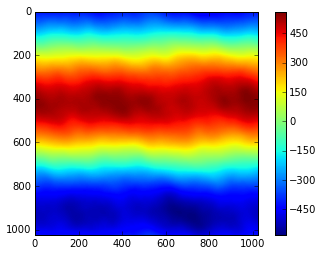

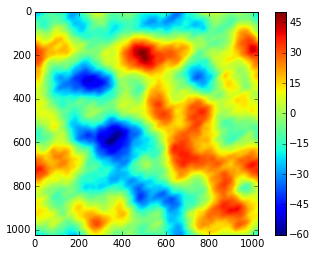

In [81]:
Nd = 5
d = np.zeros( (Nd, N, N) )
F_dTrue = np.zeros( (Nd, N, N), dtype='complex' )

for i in range(Nd):
    q, F_q, r, phi = spatial_synthetic()
    d[i] = q.real
    F_dTrue[i] = F_q
    
    plt.figure()
    plt.imshow(d[i])
    plt.colorbar()
    plt.show()

### Add noise to data (Gaussian noise)

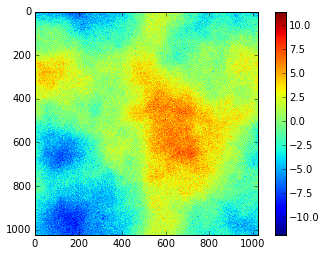

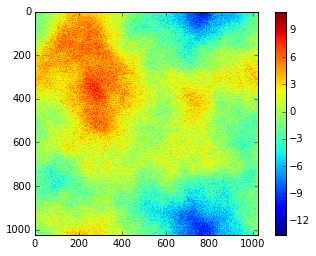

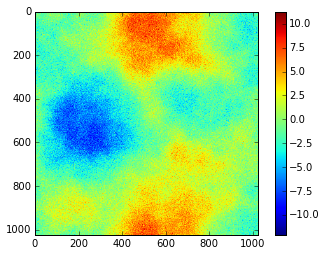

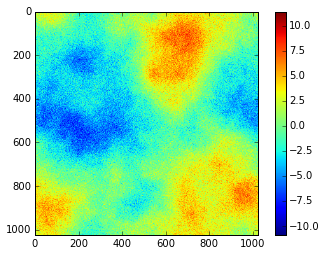

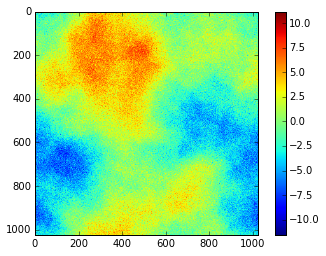

In [66]:
# mn = 0.,
# std = 1e0

# for i in range(Nd):
#     d[i] += np.random.normal( mn, std, (N,N) )
    
#     plt.figure()
#     plt.imshow(d[i])
#     plt.colorbar()
#     plt.show()

In [82]:
from tempfile import TemporaryFile
GIT_Final_SpatialData = TemporaryFile()
np.savez( 'GIT_Final_SpatialData', Spatial_Field=d, Fourier_Field=F_dTrue )
GIT_Final_SpatialData.seek(0)

### Derive periodograms for each spatial field

In [83]:
fname = 'GIT_Final_SpatialData.npz'

p = idealmodel.IDEALFile(fname)
nbins, Nt, Nx, Ny, k, l, PSD_2d, Ki, iso_spec, area = p.power_spectrum_2d(varname='Spatial_Field')   # Calculates all the variables necessary for an isotropic spectra

F_dObs = iso_spec/Nt

(array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
          1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
          1.00000000e+02,   1.00000000e+03,   1.00000000e+04,
          1.00000000e+05,   1.00000000e+06,   1.00000000e+07,
          1.00000000e+08,   1.00000000e+09,   1.00000000e+10]),
 <a list of 15 Text yticklabel objects>)

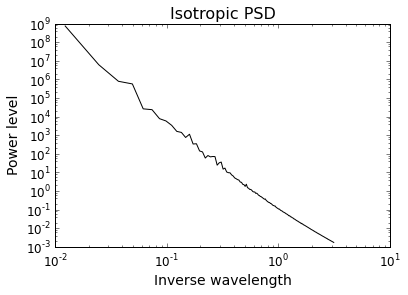

In [84]:
fig = plt.figure( figsize=(6,4) )

ax = plt.gca()
ax.loglog(Ki, F_dObs, 'k')
ax.set_title('Isotropic PSD', fontsize=16)
ax.set_xlabel('Inverse wavelength', fontsize=14)
ax.set_ylabel('Power level', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)